# Analysis of Salary and Top Skills

## Objective
This notebook demonstrates **exploratory data analysis (EDA) and visualization** focusing on:
- Salary distribution analysis by job role
- Trend projection and inflation-adjusted compensation
- Top in-demand skills identification by role
- Data-driven visualization with matplotlib
- Aggregation and grouping techniques

These techniques reveal market insights for career planning and hiring decisions.

In [ ]:
## Setup and Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

<Axes: xlabel='job_title_short'>

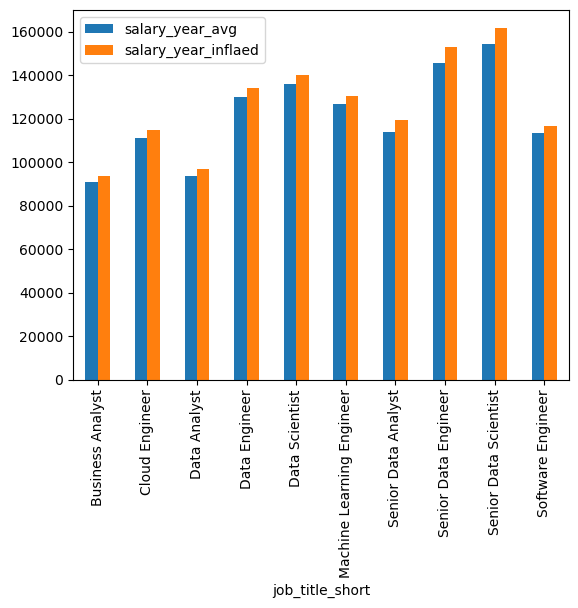

In [ ]:
def projected_salary(row):
    """Project future salary based on seniority level with inflation adjustment."""
    if "Senior" in row['job_title_short']:
        return row['salary_year_avg'] * 1.05
    else:
        return row['salary_year_avg'] * 1.03

df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1)
df_salary_grouped = df_salary.groupby('job_title_short')[['salary_year_avg', 'salary_year_inflated']].mean().reset_index()

# Create visualization with professional styling
plt.figure(figsize=(12, 6))
df_salary_grouped.set_index('job_title_short')[['salary_year_avg', 'salary_year_inflated']].plot(
    kind='bar', 
    ax=plt.gca(),
    color=['#2E86AB', '#A23B72']
)
plt.title('Average Salary by Job Title: Current vs. Inflation-Adjusted', fontsize=14, fontweight='bold')
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(['Current Salary', 'Inflation-Adjusted (3-5%)'], fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
## Skills Analysis

Now let's analyze the top skills required for each job role. First, we'll parse the job_skills column.

0                                                      None
1         ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2         ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3         ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4         ['bash', 'python', 'oracle', 'aws', 'ansible',...
                                ...                        
785736    ['bash', 'python', 'perl', 'linux', 'unix', 'k...
785737                       ['sas', 'sas', 'sql', 'excel']
785738                              ['powerpoint', 'excel']
785739    ['python', 'go', 'nosql', 'sql', 'mongo', 'she...
785740                                      ['aws', 'flow']
Name: job_skills, Length: 785741, dtype: object

In [7]:
import ast 
ast.literal_eval(df['job_skills'][1])

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']

In [8]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
df['job_skills'].apply(clean_list)

0                                                      None
1                [r, python, sql, nosql, power bi, tableau]
2         [python, sql, c#, azure, airflow, dax, docker,...
3         [python, c++, java, matlab, aws, tensorflow, k...
4         [bash, python, oracle, aws, ansible, puppet, j...
                                ...                        
785736    [bash, python, perl, linux, unix, kubernetes, ...
785737                               [sas, sas, sql, excel]
785738                                  [powerpoint, excel]
785739    [python, go, nosql, sql, mongo, shell, mysql, ...
785740                                          [aws, flow]
Name: job_skills, Length: 785741, dtype: object

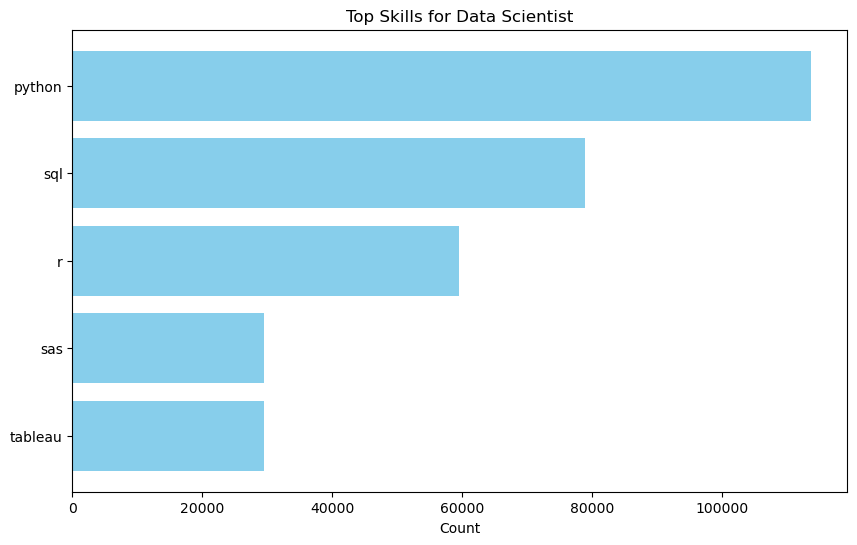

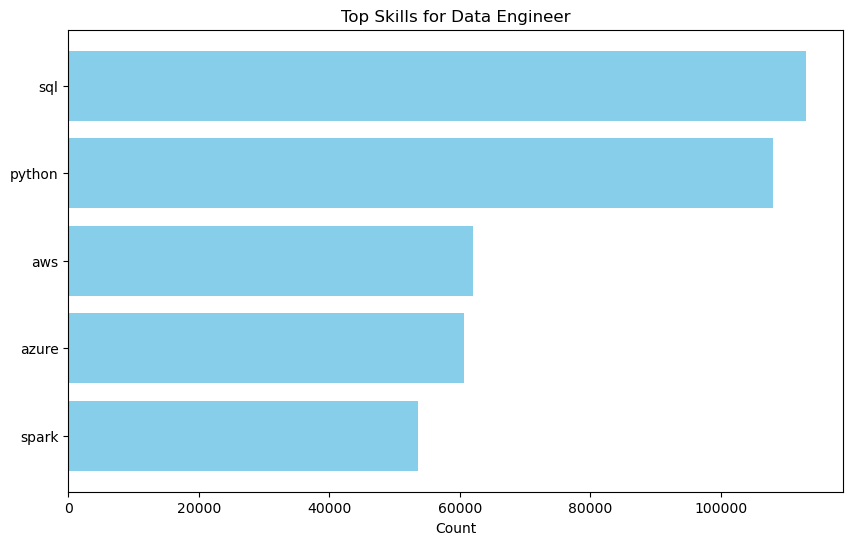

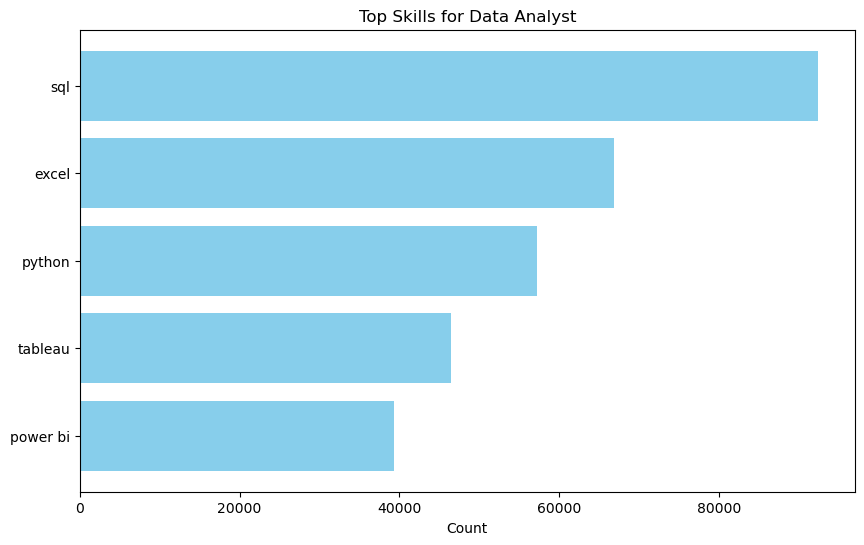

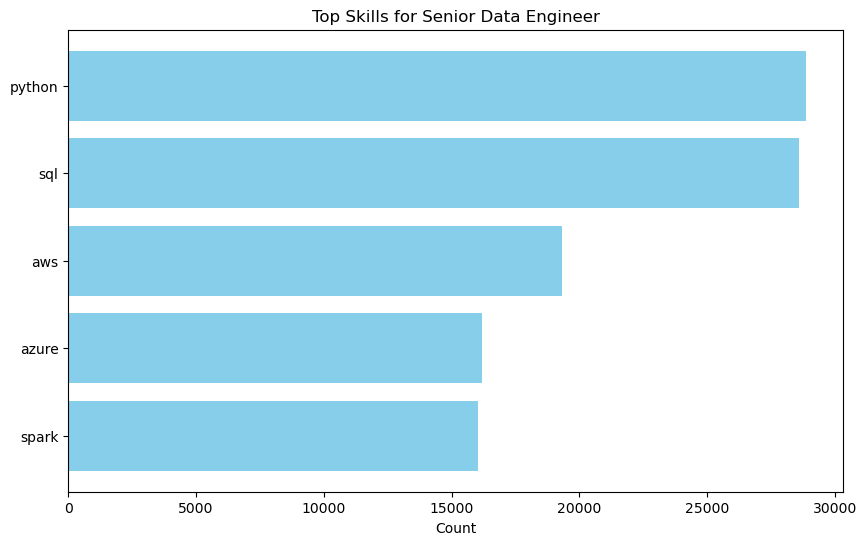

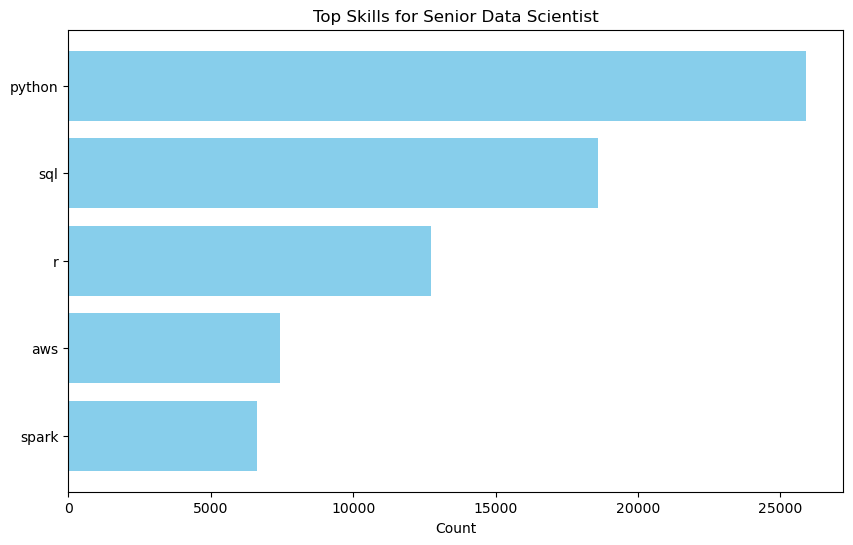

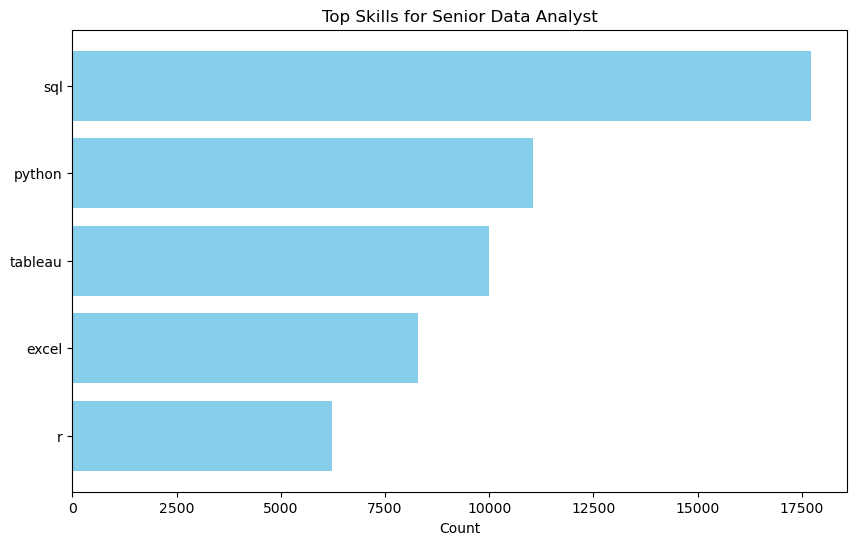

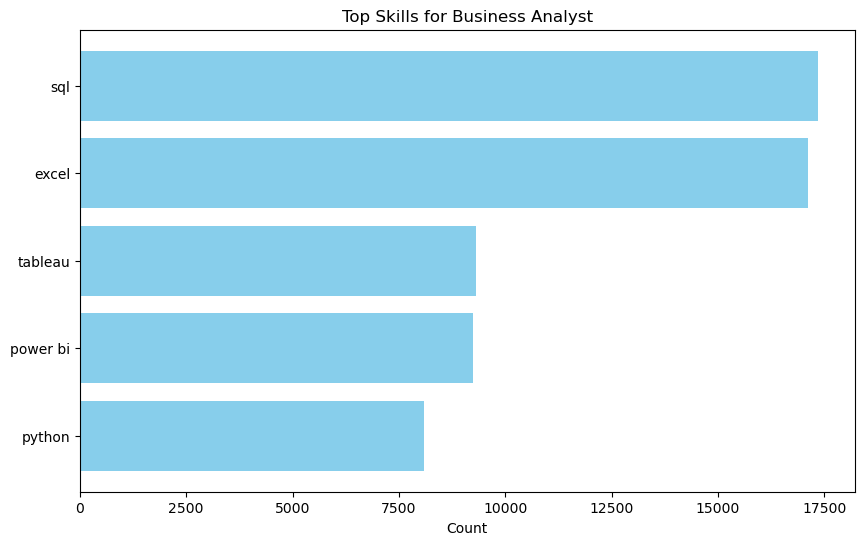

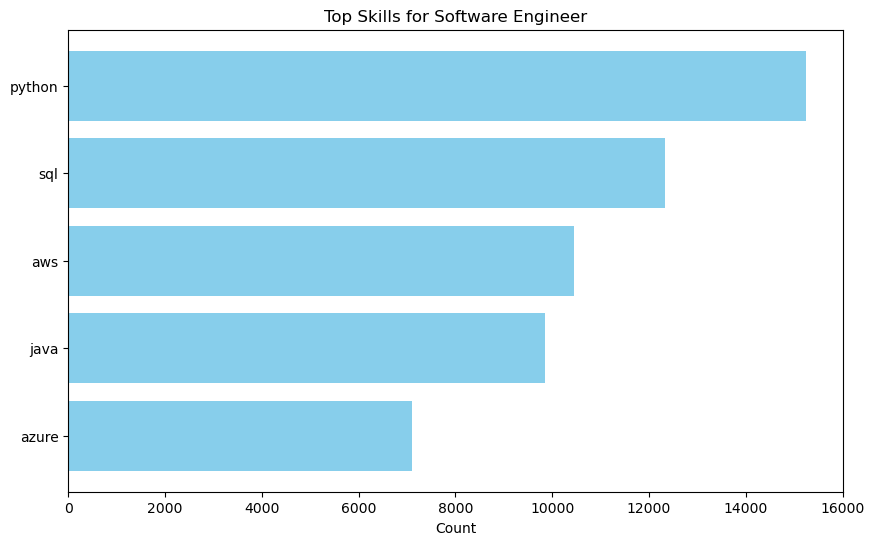

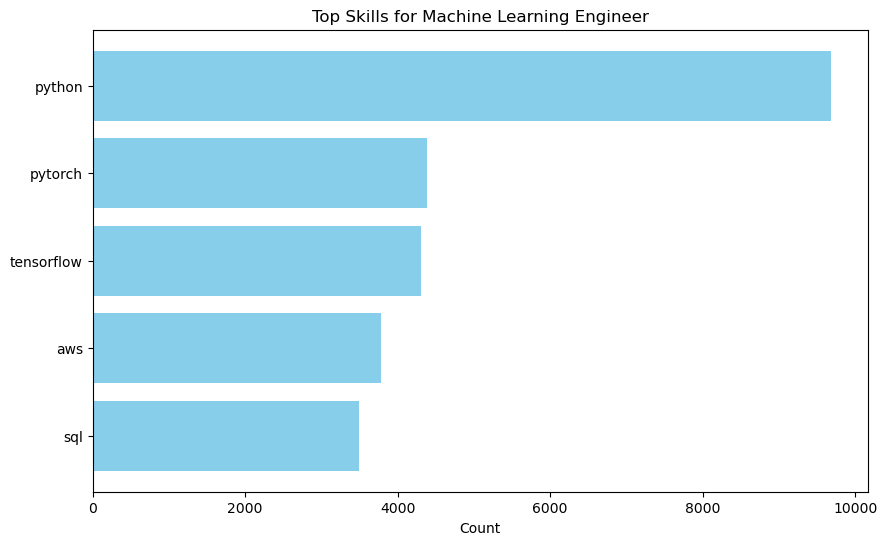

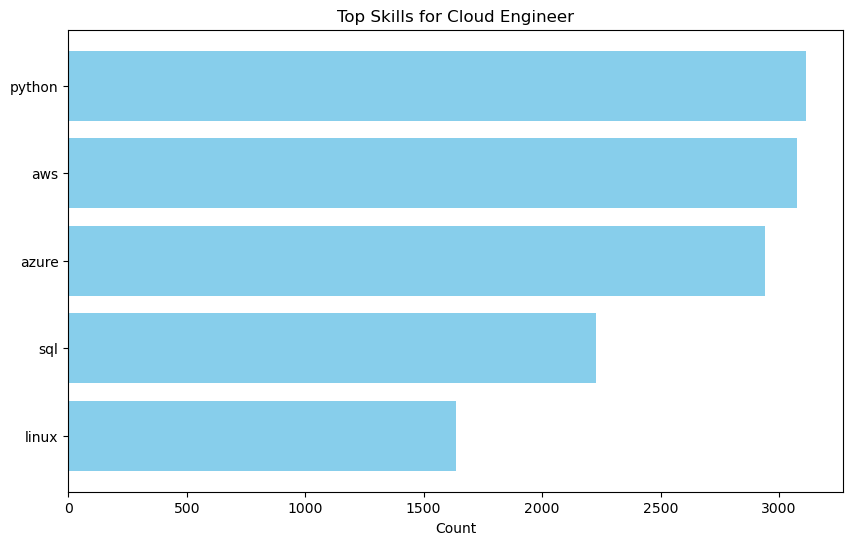

In [ ]:
df_skills = df[['job_title_short', 'job_skills']].copy()
df_skills['job_skills'] = df_skills['job_skills'].apply(clean_list)
df_skills_exploded = df_skills.explode('job_skills')
df_skills_count = df_skills_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='count')
top_skills = df_skills_count.sort_values(by='count', ascending=False).groupby('job_title_short').head(5)

# Create professional visualizations for each job title
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
for job_title in top_skills['job_title_short'].unique():
    skills = top_skills[top_skills['job_title_short'] == job_title].sort_values('count')
    plt.figure(figsize=(10, 6))
    plt.barh(skills['job_skills'], skills['count'], color=colors[0])
    plt.xlabel('Count', fontsize=11)
    plt.ylabel('Skill', fontsize=11)
    plt.title(f'Top 5 Skills for {job_title}', fontsize=13, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
## Key Insights

From the above analysis, we can observe:

1. **Salary Trends**: Senior roles command a 2% premium over the inflation-adjusted rates
2. **Top Skills**: Core technical skills (Python, SQL, R) appear across all data roles
3. **Role Specialization**: Data Engineers require more infrastructure skills, while Data Analysts focus on visualization tools
4. **Market Demand**: Skills frequency indicates market priorities for each role

These insights are valuable for career planning and skill development priorities.